# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

In [3]:
cities

['arraial do cabo',
 'ponta do sol',
 'aklavik',
 'te anau',
 'kavieng',
 'khudumelapye',
 'carnarvon',
 'katha',
 'meadow lake',
 'marcona',
 'mount gambier',
 'rikitea',
 'lavrentiya',
 'thompson',
 'carlsbad',
 'matara',
 'san ramon de la nueva oran',
 'rawson',
 'saskylakh',
 'mahibadhoo',
 'belushya guba',
 'sawtell',
 'linxia',
 'ushuaia',
 'khatanga',
 'mys shmidta',
 'bluff',
 'bogale',
 'mombetsu',
 'albany',
 'saint-pierre',
 'cap malheureux',
 'anito',
 'jamestown',
 'mar del plata',
 'vardo',
 'ailigandi',
 'chimbote',
 'paradwip',
 'san diego',
 'serabu',
 'komsomolskiy',
 'hasaki',
 'illoqqortoormiut',
 'mataura',
 'chokurdakh',
 'yurimaguas',
 'caravelas',
 'sitka',
 'mehamn',
 'rajgarh',
 'lahuachaca',
 'barrow',
 'vestmannaeyjar',
 'atuona',
 'shubarkuduk',
 'marsh harbour',
 'kikwit',
 'yaan',
 'mahaicony',
 'guerrero negro',
 'kawalu',
 'upernavik',
 'hobart',
 'nome',
 'along',
 'busselton',
 'clyde river',
 'qaanaaq',
 'punta arenas',
 'port elizabeth',
 'mahebourg

In [4]:
indexes=list(range(0,len(cities)))

In [5]:
cities1 = pd.DataFrame(cities, index=indexes, columns=["City"])
cities1

,City
0,arraial do cabo
1,ponta do sol
2,aklavik
3,te anau
4,kavieng
...,...
625,bilma
626,port macquarie
627,honggang
628,codrington


In [6]:
cities1["Cloudiness"]=""
cities1["Country"]=""
cities1["Date"]=""
cities1["Humidity"]=""
cities1["Latitude"]=""
cities1["Longitude"]=""
cities1["Max temp"]=""
cities1["Wind speed"]=""

In [7]:
cities1

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max temp,Wind speed
0,arraial do cabo,,,,,,,,
1,ponta do sol,,,,,,,,
2,aklavik,,,,,,,,
3,te anau,,,,,,,,
4,kavieng,,,,,,,,
...,...,...,...,...,...,...,...,...,...
625,bilma,,,,,,,,
626,port macquarie,,,,,,,,
627,honggang,,,,,,,,
628,codrington,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#trial
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f'{url}appid={weather_api_key}&units=metric&q={cities1.loc[2,"City"]}'



In [9]:
# identifying json
response=requests.get(query_url).json()
response

{'coord': {'lon': -135.01, 'lat': 68.22},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': -9,
  'feels_like': -14.37,
  'temp_min': -9,
  'temp_max': -9,
  'pressure': 1032,
  'humidity': 78},
 'visibility': 10000,
 'wind': {'speed': 3.1, 'deg': 170},
 'clouds': {'all': 90},
 'dt': 1603380327,
 'sys': {'type': 1,
  'id': 821,
  'country': 'CA',
  'sunrise': 1603384461,
  'sunset': 1603414449},
 'timezone': -21600,
 'id': 5882953,
 'name': 'Aklavik',
 'cod': 200}

In [10]:
response['coord']['lon']

-135.01

In [11]:
response['name']

'Aklavik'

In [12]:
response['weather'][0]['description']

'overcast clouds'

In [13]:
response['main']['humidity']

78

In [14]:
response['clouds']['all']

90

In [15]:
response['sys']['country']

'CA'

In [16]:
my_responses=[]
for i, row in cities1.iterrows():
    try:
        print(f'Processing record {i+1} of {len(indexes)}: {cities1.loc[i, "City"]}')
        query_url = f'{url}appid={weather_api_key}&units=metric&q={cities1.loc[i, "City"]}'
        query_url=query_url.replace(" " ,"+")
        response = requests.get(query_url).json()
        my_responses.append(response)
    except:
        print("City not found. Skipping...")

Processing record 1 of 630: arraial do cabo
Processing record 2 of 630: ponta do sol
Processing record 3 of 630: aklavik
Processing record 4 of 630: te anau
Processing record 5 of 630: kavieng
Processing record 6 of 630: khudumelapye
Processing record 7 of 630: carnarvon
Processing record 8 of 630: katha
Processing record 9 of 630: meadow lake
Processing record 10 of 630: marcona
Processing record 11 of 630: mount gambier
Processing record 12 of 630: rikitea
Processing record 13 of 630: lavrentiya
Processing record 14 of 630: thompson
Processing record 15 of 630: carlsbad
Processing record 16 of 630: matara
Processing record 17 of 630: san ramon de la nueva oran
Processing record 18 of 630: rawson
Processing record 19 of 630: saskylakh
Processing record 20 of 630: mahibadhoo
Processing record 21 of 630: belushya guba
Processing record 22 of 630: sawtell
Processing record 23 of 630: linxia
Processing record 24 of 630: ushuaia
Processing record 25 of 630: khatanga
Processing record 26 of

Processing record 211 of 630: dikson
Processing record 212 of 630: geraldton
Processing record 213 of 630: praia
Processing record 214 of 630: ambon
Processing record 215 of 630: kusk
Processing record 216 of 630: kiunga
Processing record 217 of 630: airai
Processing record 218 of 630: oranjemund
Processing record 219 of 630: foso
Processing record 220 of 630: saint-philippe
Processing record 221 of 630: samalaeulu
Processing record 222 of 630: husavik
Processing record 223 of 630: kingsville
Processing record 224 of 630: tahta
Processing record 225 of 630: biak
Processing record 226 of 630: ilo
Processing record 227 of 630: puerto ayora
Processing record 228 of 630: sebaco
Processing record 229 of 630: mogocha
Processing record 230 of 630: khilok
Processing record 231 of 630: xichang
Processing record 232 of 630: cortez
Processing record 233 of 630: sarakhs
Processing record 234 of 630: kieta
Processing record 235 of 630: belyy
Processing record 236 of 630: sangar
Processing record 23

Processing record 422 of 630: kamenskoye
Processing record 423 of 630: karaul
Processing record 424 of 630: rochester
Processing record 425 of 630: lerwick
Processing record 426 of 630: waipawa
Processing record 427 of 630: istanbul
Processing record 428 of 630: saint george
Processing record 429 of 630: iralaya
Processing record 430 of 630: san cristobal
Processing record 431 of 630: mossendjo
Processing record 432 of 630: babanusah
Processing record 433 of 630: alugan
Processing record 434 of 630: lakes entrance
Processing record 435 of 630: taoudenni
Processing record 436 of 630: oga
Processing record 437 of 630: ilebo
Processing record 438 of 630: talakan
Processing record 439 of 630: modra
Processing record 440 of 630: mariinsk
Processing record 441 of 630: nicoya
Processing record 442 of 630: lac-megantic
Processing record 443 of 630: nanortalik
Processing record 444 of 630: tres picos
Processing record 445 of 630: maine-soroa
Processing record 446 of 630: lazaro cardenas
Process

Processing record 629 of 630: codrington
Processing record 630 of 630: evensk


In [17]:

my_responses[1]

{'coord': {'lon': -17.1, 'lat': 32.67},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 21.49,
  'feels_like': 20.91,
  'temp_min': 21.11,
  'temp_max': 22,
  'pressure': 1018,
  'humidity': 53},
 'visibility': 10000,
 'wind': {'speed': 1.5, 'deg': 0},
 'clouds': {'all': 40},
 'dt': 1603380272,
 'sys': {'type': 1,
  'id': 6894,
  'country': 'PT',
  'sunrise': 1603351071,
  'sunset': 1603391247},
 'timezone': 3600,
 'id': 2264557,
 'name': 'Ponta do Sol',
 'cod': 200}

In [18]:
for i, row in cities1.iterrows():
    try:
        cities1.loc[i, "Cloudiness"]=my_responses[i]['clouds']['all']
        cities1.loc[i, "Country"]=my_responses[i]['sys']['country']
        cities1.loc[i, "Date"]=my_responses[i]['dt']
        cities1.loc[i, "Humidity"]=my_responses[i]['main']['humidity']
        cities1.loc[i, "Latitude"]=my_responses[i]['coord']['lat']
        cities1.loc[i, "Longitude"]=my_responses[i]['coord']['lon']
        cities1.loc[i, "Max temp"]=my_responses[i]['main']['temp_max']
        cities1.loc[i, "Wind speed"]=my_responses[i]['wind']['speed']
    except:
        print(f'Missing values for {cities1.loc[i, "City"]}')

Missing values for katha
Missing values for marcona
Missing values for belushya guba
Missing values for mys shmidta
Missing values for paradwip
Missing values for illoqqortoormiut
Missing values for mahaicony
Missing values for samusu
Missing values for barentsburg
Missing values for taolanaro
Missing values for phan rang
Missing values for attawapiskat
Missing values for aflu
Missing values for amderma
Missing values for nguiu
Missing values for grand river south east
Missing values for skalistyy
Missing values for barawe
Missing values for sentyabrskiy
Missing values for kusk
Missing values for samalaeulu
Missing values for tuggurt
Missing values for lolua
Missing values for denau
Missing values for vaitupu
Missing values for blonduos
Missing values for kazalinsk
Missing values for umzimvubu
Missing values for tsihombe
Missing values for palabuhanratu
Missing values for araguatins
Missing values for halalo
Missing values for tokzar
Missing values for ozgon
Missing values for maymanak

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
cities1

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max temp,Wind speed
0,arraial do cabo,40,BR,1603380569,61,-22.97,-42.03,26,7.2
1,ponta do sol,40,PT,1603380272,53,32.67,-17.1,22,1.5
2,aklavik,90,CA,1603380327,78,68.22,-135.01,-9,3.1
3,te anau,100,NZ,1603380570,85,-45.42,167.72,6.28,0.84
4,kavieng,51,PG,1603380570,71,-2.57,150.8,28.38,4.12
...,...,...,...,...,...,...,...,...,...
625,bilma,0,NE,1603380808,11,18.69,12.92,33.73,3.22
626,port macquarie,90,AU,1603380702,100,-31.43,152.92,16.11,1
627,honggang,0,CN,1603380809,84,46.47,124.87,-0.41,3.97
628,codrington,100,AU,1603380809,93,-38.27,141.97,11.14,2.43


In [21]:
cities1['Country'].replace('', np.nan, inplace=True)
cities1

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max temp,Wind speed
0,arraial do cabo,40,BR,1603380569,61,-22.97,-42.03,26,7.2
1,ponta do sol,40,PT,1603380272,53,32.67,-17.1,22,1.5
2,aklavik,90,CA,1603380327,78,68.22,-135.01,-9,3.1
3,te anau,100,NZ,1603380570,85,-45.42,167.72,6.28,0.84
4,kavieng,51,PG,1603380570,71,-2.57,150.8,28.38,4.12
...,...,...,...,...,...,...,...,...,...
625,bilma,0,NE,1603380808,11,18.69,12.92,33.73,3.22
626,port macquarie,90,AU,1603380702,100,-31.43,152.92,16.11,1
627,honggang,0,CN,1603380809,84,46.47,124.87,-0.41,3.97
628,codrington,100,AU,1603380809,93,-38.27,141.97,11.14,2.43


In [22]:
cities1.dropna(subset=['Country'], inplace=True)
cities1.shape

(583, 9)

In [23]:
cities1.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max temp,Wind speed
0,arraial do cabo,40,BR,1603380569,61,-22.97,-42.03,26,7.2
1,ponta do sol,40,PT,1603380272,53,32.67,-17.1,22,1.5
2,aklavik,90,CA,1603380327,78,68.22,-135.01,-9,3.1
3,te anau,100,NZ,1603380570,85,-45.42,167.72,6.28,0.84
4,kavieng,51,PG,1603380570,71,-2.57,150.8,28.38,4.12


In [88]:
cities1.index = range(len(cities1.index))
cities1.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max temp,Wind speed
0,arraial do cabo,40,BR,1603380569,61,-22.97,-42.03,26,7.2
1,ponta do sol,40,PT,1603380272,53,32.67,-17.1,22,1.5
2,aklavik,90,CA,1603380327,78,68.22,-135.01,-9,3.1
3,te anau,100,NZ,1603380570,85,-45.42,167.72,6.28,0.84
4,kavieng,51,PG,1603380570,71,-2.57,150.8,28.38,4.12


In [89]:
cities1.to_csv(output_data_file, index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [25]:
import datetime
timestamp = datetime.datetime.fromtimestamp(cities1.loc[0,"Date"])
current_date = timestamp.strftime('%Y-%m-%d')
print(current_date)

2020-10-22


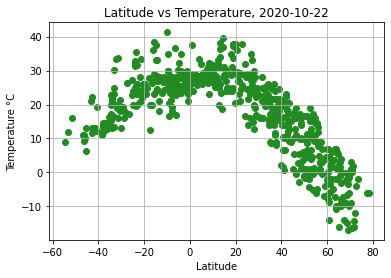

In [90]:
plt.scatter(x=cities1["Latitude"], y=cities1["Max temp"], color="forestgreen")
plt.xlabel("Latitude")
plt.ylabel("Temperature °C")
plt.title(f"Latitude vs Temperature, {current_date}")
plt.grid(True)
plt.savefig("../output_data/Scatter1.png")
plt.show()

#### Latitude vs. Humidity Plot

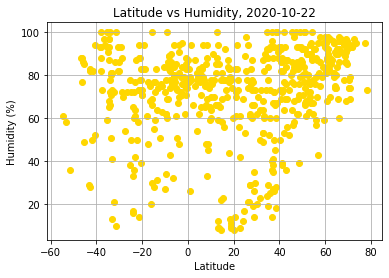

In [91]:
plt.scatter(x=cities1["Latitude"], y=cities1["Humidity"], color="gold")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude vs Humidity, {current_date}")
plt.grid(True)
plt.savefig("../output_data/Scatter2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

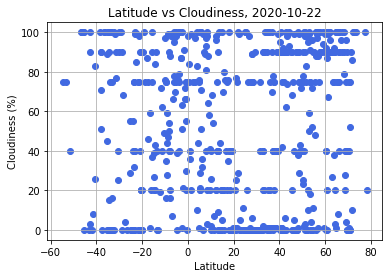

In [92]:
plt.scatter(x=cities1["Latitude"], y=cities1["Cloudiness"], color="royalblue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude vs Cloudiness, {current_date}")
plt.grid(True)
plt.savefig("../output_data/Scatter3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

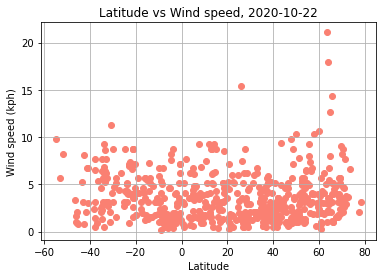

In [93]:
plt.scatter(x=cities1["Latitude"], y=cities1["Wind speed"], color="salmon")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (kph)")
plt.title(f"Latitude vs Wind speed, {current_date}")
plt.grid(True)
plt.savefig("../output_data/Scatter4.png")
plt.show()

## Linear Regression

In [30]:
# OPTIONAL: Create a function to create Linear Regression plots


In [31]:
# Create Northern and Southern Hemisphere DataFrames
cities2= cities1.copy()
cities2

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max temp,Wind speed
0,arraial do cabo,40,BR,1603380569,61,-22.97,-42.03,26,7.2
1,ponta do sol,40,PT,1603380272,53,32.67,-17.1,22,1.5
2,aklavik,90,CA,1603380327,78,68.22,-135.01,-9,3.1
3,te anau,100,NZ,1603380570,85,-45.42,167.72,6.28,0.84
4,kavieng,51,PG,1603380570,71,-2.57,150.8,28.38,4.12
...,...,...,...,...,...,...,...,...,...
578,bilma,0,NE,1603380808,11,18.69,12.92,33.73,3.22
579,port macquarie,90,AU,1603380702,100,-31.43,152.92,16.11,1
580,honggang,0,CN,1603380809,84,46.47,124.87,-0.41,3.97
581,codrington,100,AU,1603380809,93,-38.27,141.97,11.14,2.43


In [32]:
cities2["Hemisphere"]=""
cities2

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max temp,Wind speed,Hemisphere
0,arraial do cabo,40,BR,1603380569,61,-22.97,-42.03,26,7.2,
1,ponta do sol,40,PT,1603380272,53,32.67,-17.1,22,1.5,
2,aklavik,90,CA,1603380327,78,68.22,-135.01,-9,3.1,
3,te anau,100,NZ,1603380570,85,-45.42,167.72,6.28,0.84,
4,kavieng,51,PG,1603380570,71,-2.57,150.8,28.38,4.12,
...,...,...,...,...,...,...,...,...,...,...
578,bilma,0,NE,1603380808,11,18.69,12.92,33.73,3.22,
579,port macquarie,90,AU,1603380702,100,-31.43,152.92,16.11,1,
580,honggang,0,CN,1603380809,84,46.47,124.87,-0.41,3.97,
581,codrington,100,AU,1603380809,93,-38.27,141.97,11.14,2.43,


In [33]:
for i in range(len(cities2["City"])):
    if cities2.loc[i, "Latitude"]>=0:
        cities2.loc[i, "Hemisphere"]="Northern Hemisphere"
    else:
        cities2.loc[i, "Hemisphere"]="Southern Hemisphere"

cities2
    

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max temp,Wind speed,Hemisphere
0,arraial do cabo,40,BR,1603380569,61,-22.97,-42.03,26,7.2,Southern Hemisphere
1,ponta do sol,40,PT,1603380272,53,32.67,-17.1,22,1.5,Northern Hemisphere
2,aklavik,90,CA,1603380327,78,68.22,-135.01,-9,3.1,Northern Hemisphere
3,te anau,100,NZ,1603380570,85,-45.42,167.72,6.28,0.84,Southern Hemisphere
4,kavieng,51,PG,1603380570,71,-2.57,150.8,28.38,4.12,Southern Hemisphere
...,...,...,...,...,...,...,...,...,...,...
578,bilma,0,NE,1603380808,11,18.69,12.92,33.73,3.22,Northern Hemisphere
579,port macquarie,90,AU,1603380702,100,-31.43,152.92,16.11,1,Southern Hemisphere
580,honggang,0,CN,1603380809,84,46.47,124.87,-0.41,3.97,Northern Hemisphere
581,codrington,100,AU,1603380809,93,-38.27,141.97,11.14,2.43,Southern Hemisphere


In [34]:
North_df=cities2.loc[cities2["Hemisphere"]=="Northern Hemisphere"]
North_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max temp,Wind speed,Hemisphere
1,ponta do sol,40,PT,1603380272,53,32.67,-17.1,22,1.5,Northern Hemisphere
2,aklavik,90,CA,1603380327,78,68.22,-135.01,-9,3.1,Northern Hemisphere
7,meadow lake,1,US,1603380571,19,34.8,-106.54,17.22,2.1,Northern Hemisphere
10,lavrentiya,8,RU,1603380572,90,65.58,-171,1.57,1.15,Northern Hemisphere
11,thompson,75,CA,1603380301,92,55.74,-97.86,-5,3.1,Northern Hemisphere
...,...,...,...,...,...,...,...,...,...,...
573,sobolevo,72,RU,1603380807,88,54.43,31.9,9.24,6.4,Northern Hemisphere
576,pizarro,76,CO,1603380808,83,4.95,-77.37,27.16,2.19,Northern Hemisphere
578,bilma,0,NE,1603380808,11,18.69,12.92,33.73,3.22,Northern Hemisphere
580,honggang,0,CN,1603380809,84,46.47,124.87,-0.41,3.97,Northern Hemisphere


In [35]:
South_df=cities2.loc[cities2["Hemisphere"]=="Southern Hemisphere"]
South_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max temp,Wind speed,Hemisphere
0,arraial do cabo,40,BR,1603380569,61,-22.97,-42.03,26,7.2,Southern Hemisphere
3,te anau,100,NZ,1603380570,85,-45.42,167.72,6.28,0.84,Southern Hemisphere
4,kavieng,51,PG,1603380570,71,-2.57,150.8,28.38,4.12,Southern Hemisphere
5,khudumelapye,0,BW,1603380570,16,-23.88,24.75,32.92,5.03,Southern Hemisphere
6,carnarvon,0,AU,1603380570,72,-24.87,113.63,20,8.7,Southern Hemisphere
...,...,...,...,...,...,...,...,...,...,...
574,chicama,20,PE,1603380807,82,-7.84,-79.15,18,3.6,Southern Hemisphere
575,sampit,1,ID,1603380808,95,-2.53,112.95,24.37,0.89,Southern Hemisphere
577,fare,1,PF,1603380808,75,-16.7,-151.02,26.23,4.6,Southern Hemisphere
579,port macquarie,90,AU,1603380702,100,-31.43,152.92,16.11,1,Southern Hemisphere


In [36]:
import scipy.stats as st

In [37]:
North_df[["Cloudiness", "Humidity", "Latitude", "Longitude", "Max temp", "Wind speed"]] = North_df[["Cloudiness", "Humidity", "Latitude", "Longitude", "Max temp", "Wind speed"]].apply(pd.to_numeric)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [38]:
North_df.dtypes

City           object
Cloudiness      int64
Country        object
Date           object
Humidity        int64
Latitude      float64
Longitude     float64
Max temp      float64
Wind speed    float64
Hemisphere     object
dtype: object

In [39]:
South_df[["Cloudiness", "Humidity", "Latitude", "Longitude", "Max temp", "Wind speed"]] = South_df[["Cloudiness", "Humidity", "Latitude", "Longitude", "Max temp", "Wind speed"]].apply(pd.to_numeric)

In [40]:
South_df.dtypes

City           object
Cloudiness      int64
Country        object
Date           object
Humidity        int64
Latitude      float64
Longitude     float64
Max temp      float64
Wind speed    float64
Hemisphere     object
dtype: object

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [72]:
Min_Lat = South_df["Latitude"].min()
Max_Lat = North_df["Latitude"].max()

r^2 value: 0.7837


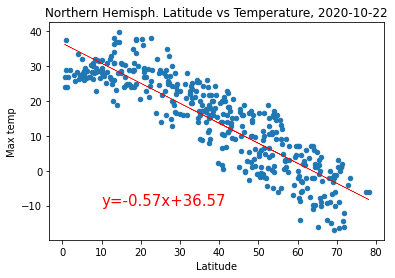

In [94]:
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(North_df["Latitude"], North_df["Max temp"])
r_square=rvalue**2

x_values=North_df["Latitude"]

regress_values=x_values*slope+intercept

line_equation=(f'y={round(slope,2)}x+{round(intercept,2)}')

North_df.plot(kind="scatter", x="Latitude", y="Max temp")
plt.plot(x_values, regress_values, color="red", linestyle="solid", linewidth=0.5)
plt.annotate(line_equation, (10, -10), fontsize=15, color="red")
plt.title(f"Northern Hemisph. Latitude vs Temperature, {current_date}")
print(f'r^2 value: {round(r_square,4)}')
plt.savefig("../output_data/LinReg1.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r^2 value: 0.4201


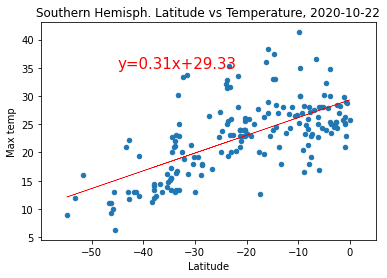

In [96]:
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(South_df["Latitude"], South_df["Max temp"])
r_square=rvalue**2

x_values=South_df["Latitude"]

regress_values=x_values*slope+intercept

line_equation=(f'y={round(slope,2)}x+{round(intercept,2)}')

South_df.plot(kind="scatter", x="Latitude", y="Max temp")
plt.plot(x_values, regress_values, color="red", linestyle="solid", linewidth=0.5)
plt.annotate(line_equation, (-45, 35), fontsize=15, color="red")
plt.xlim(Min_Lat-5,5)
plt.title(f"Southern Hemisph. Latitude vs Temperature, {current_date}")
plt.savefig("../output_data/LinReg2.png")
print(f'r^2 value: {round(r_square,4)}')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r^2 value: 0.1136


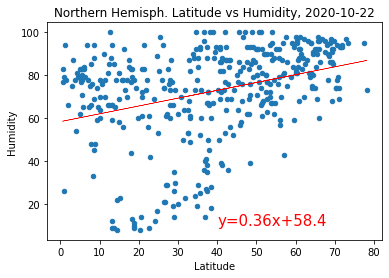

In [99]:
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(North_df["Latitude"], North_df["Humidity"])
r_square=rvalue**2

x_values=North_df["Latitude"]

regress_values=x_values*slope+intercept

line_equation=(f'y={round(slope,2)}x+{round(intercept,2)}')

North_df.plot(kind="scatter", x="Latitude", y="Humidity")
plt.plot(x_values, regress_values, color="red", linestyle="solid", linewidth=0.5)
plt.annotate(line_equation, (40, 10), fontsize=15, color="red")
plt.title(f"Northern Hemisph. Latitude vs Humidity, {current_date}")
plt.savefig("../output_data/LinReg3.png")
print(f'r^2 value: {round(r_square,4)}')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r^2 value: 0.0013


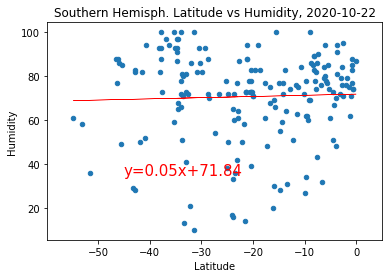

In [100]:
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(South_df["Latitude"], South_df["Humidity"])
r_square=rvalue**2

x_values=South_df["Latitude"]

regress_values=x_values*slope+intercept

line_equation=(f'y={round(slope,2)}x+{round(intercept,2)}')

South_df.plot(kind="scatter", x="Latitude", y="Humidity")
plt.plot(x_values, regress_values, color="red", linestyle="solid", linewidth=0.5)
plt.annotate(line_equation, (-45, 35), fontsize=15, color="red")
plt.xlim(Min_Lat-5,5)
plt.title(f"Southern Hemisph. Latitude vs Humidity, {current_date}")
plt.savefig("../output_data/LinReg4.png")
print(f'r^2 value: {round(r_square,4)}')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r^2 value: 0.0332


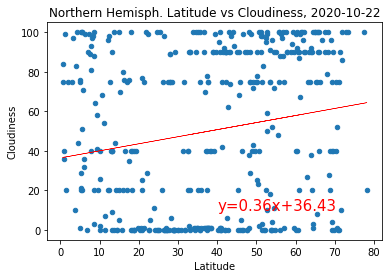

In [101]:
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(North_df["Latitude"], North_df["Cloudiness"])
r_square=rvalue**2

x_values=North_df["Latitude"]

regress_values=x_values*slope+intercept

line_equation=(f'y={round(slope,2)}x+{round(intercept,2)}')

North_df.plot(kind="scatter", x="Latitude", y="Cloudiness")
plt.plot(x_values, regress_values, color="red", linestyle="solid", linewidth=0.5)
plt.annotate(line_equation, (40, 10), fontsize=15, color="red")
plt.title(f"Northern Hemisph. Latitude vs Cloudiness, {current_date}")
plt.savefig("../output_data/LinReg5.png")
print(f'r^2 value: {round(r_square,4)}')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r^2 value: 0.0026


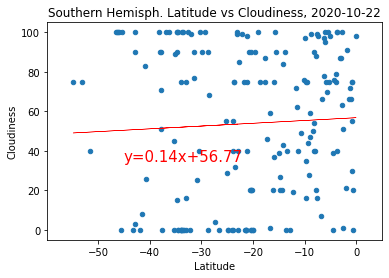

In [102]:
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(South_df["Latitude"], South_df["Cloudiness"])
r_square=rvalue**2

x_values=South_df["Latitude"]

regress_values=x_values*slope+intercept

line_equation=(f'y={round(slope,2)}x+{round(intercept,2)}')

South_df.plot(kind="scatter", x="Latitude", y="Cloudiness")
plt.plot(x_values, regress_values, color="red", linestyle="solid", linewidth=0.5)
plt.annotate(line_equation, (-45, 35), fontsize=15, color="red")
plt.xlim(Min_Lat-5,5)
plt.title(f"Southern Hemisph. Latitude vs Cloudiness, {current_date}")
plt.savefig("../output_data/LinReg6.png")
print(f'r^2 value: {round(r_square,4)}')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r^2 value: 0.0114


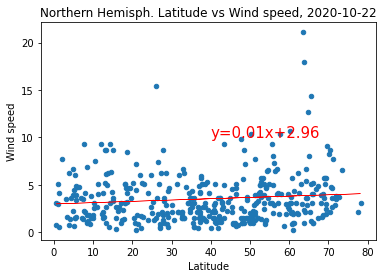

In [103]:
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(North_df["Latitude"], North_df["Wind speed"])
r_square=rvalue**2

x_values=North_df["Latitude"]

regress_values=x_values*slope+intercept

line_equation=(f'y={round(slope,2)}x+{round(intercept,2)}')

North_df.plot(kind="scatter", x="Latitude", y="Wind speed")
plt.plot(x_values, regress_values, color="red", linestyle="solid", linewidth=0.5)
plt.annotate(line_equation, (40, 10), fontsize=15, color="red")
plt.title(f"Northern Hemisph. Latitude vs Wind speed, {current_date}")
plt.savefig("../output_data/LinReg7.png")
print(f'r^2 value: {round(r_square,4)}')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r^2 value: 0.0603


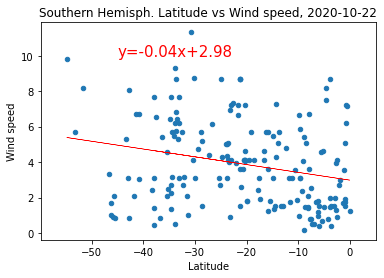

In [104]:
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(South_df["Latitude"], South_df["Wind speed"])
r_square=rvalue**2

x_values=South_df["Latitude"]

regress_values=x_values*slope+intercept

line_equation=(f'y={round(slope,2)}x+{round(intercept,2)}')

South_df.plot(kind="scatter", x="Latitude", y="Wind speed")
plt.plot(x_values, regress_values, color="red", linestyle="solid", linewidth=0.5)
plt.annotate(line_equation, (-45, 10), fontsize=15, color="red")
plt.xlim(Min_Lat-5,5)
plt.title(f"Southern Hemisph. Latitude vs Wind speed, {current_date}")
plt.savefig("../output_data/LinReg8.png")
print(f'r^2 value: {round(r_square,4)}')
plt.show()